###### First of all before we start our project  , let's import all the libraries that we might need

In [173]:
import pandas as pd 
import numpy as np
import tweepy 
from tweepy import OAuthHandler
import requests 
import os
import requests
from PIL import Image
from io import BytesIO
import json 
import matplotlib.pyplot as plt

# Gathering 

Let's create an API object to gather data this one is already provided in tweepy documentation and in the prjoect section 4 'twitter API' at Udacity , and I tried to get a develpor account from twitter but till the date I have not received the approval yet , so I went with code provided in (Accessing Project Data Without a Twitter Account) that includes the use of teewpy to query twitter API to gather the data from twitter archive for 'WeRateDogs' user then wrting that in JSON data in (tweet_json.txt) after that we need to read each json data line by line to create pd dataframe. 

Imagine here that we have run our code and we got the dataframe we wanted

consumer_key = 'HIDDEN'

consumer_secret = 'HIDDEN'

access_token = 'HIDDEN'

access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)

auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

df_1 = pd.read_csv('twitter_archive_enhanced.csv')

tweet_ids = df_1.tweet_id.values

len(tweet_ids)

To create a json fine and read it line by line we will use the following code : 

count = 0

fails_dict = {}


with open('tweet_json.txt', 'w') as outfile:
    
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass

print(fails_dict)

In [174]:


tweets_data = pd.read_csv('twitter-archive-enhanced.csv')
tweets_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [175]:
print(tweets_data.shape)

(2356, 17)


In [176]:
# here we will open the image_predictions.tsv as it was provided in the project details page 

image_pred = pd.read_csv('image-predictions.tsv' , sep= '\t')
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [177]:
image_pred.shape

(2075, 12)

When I tried this code : 

with open('tweet-json.txt) as json_file:

    data = json.load(json_file) 
     
###### I received an error states "Extra data: line 2 column 1 (char 3974)" , because json here has more than one object per line then I remebered that  pandas has the (read_json) function which I used it here it workd as below , using [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html)

In [178]:
tweets_info = pd.read_json('tweet-json.txt' , lines = True, encoding = 'utf-8')

In [179]:
tweets_info.shape

(2354, 31)

In [180]:
tweets_info.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [181]:
# since we have been informed to consider the columns of 'retweet_count' & 'favorite_count' for this project we will make a new 
# dataframe that has only three columns ('tweet_id', 'retweet_count' and 'favorite_count') in order to be able to join them later 
# we will use here ".filter()" method which allows us to make a copy with the selected columns.  
tweets_info_df = tweets_info.filter(['id','retweet_count','favorite_count'] , axis = 1)
tweets_info_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [182]:
# In order to be able to join our dataframes later we need rename id column here to match with the other two dataframes we have 
# so we will us the rename method in pandas

tweets_info_df = tweets_info_df.rename(columns = {'id' : 'tweet_id'})
tweets_info_df.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


#### Now we have three  different dataframes , that were gathred in multiple ways :  

tweets_data

image_pred

tweets_info_df

# Assessing 

let's start assess our data **visually** by looking at them 

In [183]:
tweets_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [184]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [185]:
tweets_info_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


**let's assess the dataframes programmatically**


In [186]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [187]:
tweets_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [188]:
tweets_data.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [189]:
sum(tweets_data['tweet_id'].duplicated())

0

In [190]:
tweets_data['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [191]:
tweets_data['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [192]:
tweets_data['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Bronte       1
Julio        1
Lulu         1
Swagger      1
Stefan       1
Name: name, Length: 957, dtype: int64

In [193]:
tweets_data['source'].sample(10)

1885    <a href="http://twitter.com/download/iphone" r...
1789    <a href="http://twitter.com/download/iphone" r...
2274    <a href="http://twitter.com" rel="nofollow">Tw...
147     <a href="http://twitter.com/download/iphone" r...
36      <a href="http://twitter.com/download/iphone" r...
43      <a href="http://twitter.com/download/iphone" r...
2042    <a href="http://twitter.com/download/iphone" r...
2299    <a href="http://twitter.com/download/iphone" r...
690     <a href="http://twitter.com/download/iphone" r...
1997    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [194]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [195]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [196]:
image_pred['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
radio_telescope         1
bannister               1
damselfly               1
crane                   1
clog                    1
Name: p1, Length: 378, dtype: int64

In [197]:
image_pred['p1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [198]:
image_pred['p2'].unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone',
       'Rottweiler', 'English_springer', 'mud_turtle', 'Tibetan_mastiff',
       'shopping_basket', 'komondor', 'Yorkshire_terrier',
       'English_foxhound', 'bull_mastiff', 'German_shepherd', 'Shih-Tzu',
       'Newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle',
       'otter', 'Chesapeake_Bay_retriever', 'Siberian_husky', 'skunk',
       'Afghan_hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker_spaniel', 'chow', 'Irish_terrier', 'chain_saw', 'beagle',
       'giant_schnauzer', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'Weimaraner', 'slug', 'Brittany_spaniel', 'standard_schnauzer',
       'teddy', 'armadillo', 'African_hunting_dog', 'vizsla', 'doormat',
       'pug', 'Italian_greyhound', 'Samoyed', 'Pomeranian',
       'miniature_poodle', 'Lakeland_terrier', 'Irish_setter', 'swab',
       'malamute', 'bath_towel', 'Border_collie', 'Leonberg', 'drake',
       'French_bulldog', 'ice_bear', 

In [199]:
tweets_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [200]:
tweets_info_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


 we will start with **tweets_data** dataframe for specifying quality & tidiness issues , after looking visually in both pandas & spreadsheet (excel) 
I found the following : 

### Tidiness

• the most obvious one here is dog stages which are separated into four columns whcih should be under one column , every dog stage with its value.

• join all dataframes under one dataframe instead of having having three dataframes

### Quality 

for the quality issues as you can see here there are many which we found them using different pandas functions as well as using the spreadsheet so let's highligh them:

**tweets_data :**

• timestamp dtype here is incorrect.

• tweet_id is int should be string as no mathematical calculations will be made with it.

• Columns like ("in_reply_to_status_id","in_reply_to_user_id","retweeted_status_id","retweeted_status_user_id" and "retweeted_status_timestamp") as we have been advised to not consider retweets nor replies we will drop it's columns & rows.

• some dogs name are incorrect like (a,an,this and the) I found out that by scrolling in Excel using (filter) as it's hard to see them all here in jupyter notebook.

• expanded_urls has missing values.

• rating_numerator has some wrong values like min value (zero) and max value (1776).

• rating_denominator has some wrong values like min (zero) and max value (170).

• source column has the opening & closing HTML tags which make it hard to read.

• Dogs stages has to many none values 


**image_pred** : 

• Dog breed's names some are capitalized some are lower cases - inconsistency 



# Cleaning 

In [201]:
tweets_data_clean = tweets_data.copy()
image_pred_clean = image_pred.copy()

###### Incorrect dtype

**Define**

Convert **timestamp** data type to datetime data type & **tweet_id** into string in each dataframe we have

**Code**

In [202]:
tweets_data_clean['timestamp'] = pd.to_datetime(tweets_data_clean['timestamp'])
tweets_data_clean['timestamp'] = tweets_data_clean['timestamp'].dt.floor('S') 

# here in order to get timestamp I used dt.floor('S') from this pandas documentation
##(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.floor.html)

In [203]:
tweets_data_clean['tweet_id'] = tweets_data_clean['tweet_id'].astype(str)

In [204]:
image_pred_clean['tweet_id'] = image_pred_clean['tweet_id'].astype(str)

In [205]:
tweets_info_df['tweet_id'] = tweets_info_df['tweet_id'].astype(str) 

**Test**

In [206]:
tweets_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [207]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [208]:
tweets_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


###### Extra data related to retweets and replies

**Define**

drop all columns that related to retweet & replies , here we have two quality issues to handle the first one is with rows and the second is with columns. 

after checking the tweets_data we found that wherever we have a retweet or reply the related columns will not be null , unlike the original tweets which have null values for the related columns.

In [209]:
# let's see how many replies we have in our tweets_data , to do so we need to use pandas isnull & notnull methods 
print(tweets_data_clean['in_reply_to_status_id'].notna().sum())
print(tweets_data_clean['in_reply_to_status_id'].notna().sum() == tweets_data_clean['in_reply_to_user_id'].notna().sum())

78
True


In [210]:
# let's see how many retweets we have in our tweets_data 
print(tweets_data_clean['retweeted_status_id'].notna().sum())
print(tweets_data_clean['retweeted_status_id'].notna().sum() == tweets_data_clean['retweeted_status_user_id'].notna().sum())

181
True


**Code**

In [211]:
tweets_data_clean = tweets_data_clean[tweets_data_clean['in_reply_to_status_id'].isna()]

In [212]:
tweets_data_clean = tweets_data_clean[tweets_data_clean['retweeted_status_id'].isna()]

**Test**

In [213]:
print(tweets_data_clean.shape)
print(tweets_data_clean['retweeted_status_id'].notna().sum())
print(tweets_data_clean['in_reply_to_status_id'].notna().sum())

(2097, 17)
0
0


**Code**

In [214]:
tweets_data_clean = tweets_data_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
                            'retweeted_status_timestamp'], axis = 1)

**Test**

In [215]:
print(tweets_data_clean.columns)
print(len(tweets_data_clean.columns))

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')
12


###### Incorrect dog names 

**Define** 

Correct the dog names by using replace method with Regex.

**Code**

In [216]:
# here we can see that there are 104 lowercase and 1993 Uppercase.
tweets_data_clean['name'].str.islower().value_counts() 

False    1993
True      104
Name: name, dtype: int64

From the two cells below we can see that the lowercases were almost wrong data due to whatever reason , so will replace their values with None.

In [217]:
# we will use str.contains method to check for the values of both lowercase & uppercase using regex , to see what values
# \ do they have
tweets_data_clean[tweets_data_clean['name'].str.contains('^[a-z]')== True]['name'].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [218]:
tweets_data_clean[tweets_data_clean['name'].str.contains('^[A-Z]')== True]['name'].sample(20)

1963         None
1440         None
2223         None
2108         None
828         Kirby
1365         Lucy
616          None
1287       Oliver
918          Gert
864         Buddy
2046    Alejandro
1009         None
2056         None
2295         Gabe
226          None
1142         None
1745         None
1957        Sandy
256          None
216          Kyle
Name: name, dtype: object

In [219]:
tweets_data_clean['name'] = tweets_data_clean['name'].str.replace('^[a-z]' , 'None')

**Test**

In [220]:
len(tweets_data_clean[tweets_data_clean['name'] == '^[a-z]']) 

0

###### expanded_urls has missing values

In [221]:
len(tweets_data_clean[tweets_data_clean['expanded_urls'].isnull()])

3

Here I just realized that most of the missing url which we found earlier were for retweets and replies and they have already been removed ('expanded_urls') when we filtered our dataframe to consider only original tweets.

**Define**

Delete the rows that has missing expanded_urls that means there is not picture which will not help us in our analysis 

**Code**

In [222]:
tweets_data_clean = tweets_data_clean[tweets_data_clean['expanded_urls'].notna()] 

**Test**

In [223]:
print(len(tweets_data_clean[tweets_data_clean['expanded_urls'].isnull()]))
print(tweets_data_clean.shape)

0
(2094, 12)


### rating_denominator  &  rating_numerator

######  rating_denominator

In [224]:
# let's have a look at the demominator with values that differ from 10. 

tweets_data_clean[tweets_data_clean['rating_denominator'] != 10][['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the flo...,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
902,758467244762497024,Why does this never happen at my front door......,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved sq...,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very pre...,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro...",45,50


From the code above we can see some values of rating_denominator & rating_numerator are within the text , but this type error might happend beacsue of software misinterpreting while transfering the data and some because we have multiple dogs as shown in the text, so here we can fix the issue by dropping the rows that have multiple dogs and fixing the remainings manually more clarification you can find in the report attached.  

**Define** 


Adjust the ratings of denominator & numerator manaually for the row_index numbers (1068, 1202, 1662, 2335) 

**Code**

In [225]:
tweets_data_clean.loc[1068 ,'rating_numerator'] = 14
tweets_data_clean.loc[1068 ,'rating_denominator'] = 10

In [226]:
tweets_data_clean.loc[1202 ,'rating_numerator'] = 11
tweets_data_clean.loc[1202 ,'rating_denominator'] = 10

In [227]:
tweets_data_clean.loc[1662 ,'rating_numerator'] = 10
tweets_data_clean.loc[1662 ,'rating_denominator'] = 10

In [228]:
tweets_data_clean.loc[2335 ,'rating_numerator'] = 9
tweets_data_clean.loc[2335 ,'rating_denominator'] = 10

**Test** 

In [229]:
print(tweets_data_clean.loc[1068][['rating_numerator','rating_denominator']])
print(tweets_data_clean.loc[1202][['rating_numerator','rating_denominator']])
print(tweets_data_clean.loc[1662][['rating_numerator','rating_denominator']])
print(tweets_data_clean.loc[2335][['rating_numerator','rating_denominator']])

rating_numerator      14
rating_denominator    10
Name: 1068, dtype: object
rating_numerator      11
rating_denominator    10
Name: 1202, dtype: object
rating_numerator      10
rating_denominator    10
Name: 1662, dtype: object
rating_numerator       9
rating_denominator    10
Name: 2335, dtype: object


**Define**

Drop all rows that have values bigger than 10 in rating_denominator & and for multiple set of dogs.

**Code**

In [230]:
tweets_data_clean = tweets_data_clean[tweets_data_clean['rating_denominator'] == 10]

**Test**

In [231]:
tweets_data_clean.shape

(2081, 12)

In [232]:
len(tweets_data_clean[tweets_data_clean['rating_denominator'] != 10])

0

######  rating_numerator

In [233]:
# let's see what values here we have bigger than 14 in numerator , I chose (14) because the next nearest number was (26) which \
# is high and it doesn't make sense. 
tweets_data_clean[tweets_data_clean['rating_numerator'] > 14 ]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
979,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1712,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None
2074,670842764863651840,2015-11-29 05:52:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


From the code above we can see that we only have 5 values higher than 14 within numerator column , 2 of them with row_index number (695 , 763) can be fixed manually since their ratings is inclued in the text with decimals and row_index (2074,1712,979) will be dropped ,  you can more clarification in the report attached , by the way I didn't include (1712) here because it has multiple columns  

**Define**

Adjust the numerator values for the row_index number (695, 763)

**Code**

In [234]:
tweets_data_clean.loc[695 ,'rating_numerator'] = 10
tweets_data_clean.loc[763 ,'rating_numerator'] = 11

**Test**

In [235]:
tweets_data_clean[tweets_data_clean['tweet_id'].isin(['786709082849828864','778027034220126208'])]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,10,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11,10,Sophie,None,None,pupper,None


In [236]:
tweets_data_clean =tweets_data_clean[tweets_data_clean['rating_numerator'] <= 14] 

**Test**

In [237]:
tweets_data_clean.shape

(2078, 12)

In [238]:
len(tweets_data_clean[tweets_data_clean['rating_numerator'] > 14])

0

##### Dog's breed names have capotalized letters and small letters  which may result in data inconsistency


**Define**

Change all dog's breed to be lowercases by using str.lower() method

**Code**

In [239]:
image_pred_clean['p1'] = image_pred_clean['p1'].str.lower()
image_pred_clean['p2'] = image_pred_clean['p2'].str.lower()
image_pred_clean['p3'] = image_pred_clean['p3'].str.lower()

**Test**

In [240]:
print(image_pred_clean['p1'].str.isupper().sum())
print(image_pred_clean['p2'].str.isupper().sum())
print(image_pred_clean['p3'].str.isupper().sum())

0
0
0


###### Source column is hard to read

let's have a look at it

In [241]:
tweets_data_clean['source'].value_counts()

# here we can see here we only have 4 different sources 

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1947
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

**Define**

extract the source from the provided URL using Regex

**Code**

In [242]:
tweets_data_clean['source'] = tweets_data_clean['source'].str.extract(r'([A-Z][a-z]+\s?[a-zA-Z-]?[a-zA-Z\s]+)')

In [243]:
tweets_data_clean['source'].sample(10)

824      Twitter for iPhone
1403     Twitter for iPhone
1797     Twitter for iPhone
832      Twitter for iPhone
1307     Twitter for iPhone
919      Twitter for iPhone
1742     Twitter for iPhone
1648     Twitter for iPhone
1108    Vine - Make a Scene
2131     Twitter for iPhone
Name: source, dtype: object

**Test**

In [244]:
tweets_data_clean['source'].value_counts()

Twitter for iPhone     1947
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                10
Name: source, dtype: int64

In [245]:
tweets_data_clean.sample(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2076,670838202509447168,2015-11-29 05:34:25+00:00,Twitter for iPhone,Pink dogs here. Unreasonably long necks. Left ...,https://twitter.com/dog_rates/status/670838202...,4,10,None,None,None,None,None


### Tidiness 

###### Five variables in four columns in `tweets_data_clean`  table (stage,doggo,floofer,pupper and puppo)

**Define**

Put doggo,floofer,pupper and puppo to a dog_stage column , **Note** :  here I could have been able to use melt function to do that as we learned in lesson 4 of data wrangling at udacity , but melt function will create a new row for each variable we have in dog stage value , which means I'll have to duplicated rows for each tweet with four dog stage values, so instead I'll use `.loc indexing` the same way I tused it earlier here to create dog_stage column with each row variable that match the stage.

**Code**

In [246]:
# first I'll replace each 'None' value with NaN to avoid any confusion,for sure it'll fill name column wherever there is 'None'.

tweets_data_clean = tweets_data_clean .replace('None' , np.nan) 

In [247]:
# to check the code above : 

tweets_data_clean[['name','doggo','floofer','pupper','puppo']].sample(5)

,name,doggo,floofer,pupper,puppo
1199,Jennifur,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN
953,Tucker,NaN,NaN,NaN,NaN
226,NaN,NaN,NaN,NaN,NaN
492,Atlas,NaN,NaN,NaN,NaN


In [248]:
tweets_data_clean.loc[tweets_data_clean['doggo'] == 'doggo' , 'dog_stage'] = 'doggo'
tweets_data_clean.loc[tweets_data_clean['floofer'] == 'floofer' , 'dog_stage'] = 'floofer'
tweets_data_clean.loc[tweets_data_clean['pupper'] == 'pupper' , 'dog_stage'] = 'pupper'
tweets_data_clean.loc[tweets_data_clean['puppo'] == 'puppo' , 'dog_stage'] = 'puppo'

In [249]:
tweets_data_clean['dog_stage'].value_counts()

pupper     229
doggo       72
puppo       24
floofer     10
Name: dog_stage, dtype: int64

In [250]:
tweets_data_clean.shape

(2078, 13)

In [251]:
# drop the four columns (doggo, floofer, pupper and puppo)

tweets_data_clean = tweets_data_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1) 

**Test**

In [252]:
tweets_data_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [253]:
tweets_data_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1608,685641971164143616,2016-01-09 01:59:19+00:00,Twitter for iPhone,This is Otis. He just passed a cop while going...,https://twitter.com/dog_rates/status/685641971...,7,10,Otis,pupper
744,780192070812196864,2016-09-25 23:47:39+00:00,Twitter for iPhone,We only rate dogs. Pls stop sending in non-can...,https://twitter.com/dog_rates/status/780192070...,11,10,NaN,NaN
1973,673213039743795200,2015-12-05 18:51:11+00:00,Twitter for iPhone,This is Dexter. He just got some big news. 10/...,https://twitter.com/dog_rates/status/673213039...,10,10,Dexter,NaN
176,857746408056729600,2017-04-28 00:00:54+00:00,Twitter for iPhone,Meet Thor. He doesn't have finals because he's...,https://twitter.com/dog_rates/status/857746408...,13,10,Thor,NaN
1522,690649993829576704,2016-01-22 21:39:24+00:00,Twitter for iPhone,This is Hazel. She's a gymnast. Training hard ...,https://twitter.com/dog_rates/status/690649993...,11,10,Hazel,NaN


In [254]:
# to check that there is no duplicated rows like we could have using melt method.
tweets_data_clean['tweet_id'].duplicated().sum()

0

###### Joining all Dataframes into one main dataframe

In [255]:
tweets_combined_clean = pd.merge(tweets_data_clean , tweets_info_df , how ='inner' , on = 'tweet_id')

In [256]:
tweets_combined_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 2077
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2078 non-null   object             
 1   timestamp           2078 non-null   datetime64[ns, UTC]
 2   source              2078 non-null   object             
 3   text                2078 non-null   object             
 4   expanded_urls       2078 non-null   object             
 5   rating_numerator    2078 non-null   int64              
 6   rating_denominator  2078 non-null   int64              
 7   name                1436 non-null   object             
 8   dog_stage           335 non-null    object             
 9   retweet_count       2078 non-null   int64              
 10  favorite_count      2078 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(6)
memory usage: 194.8+ KB


In [257]:
tweets_combined_clean.shape

(2078, 11)

In [258]:
tweets_combined_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
471,795076730285391872,2016-11-06 01:33:58+00:00,Twitter for iPhone,This is Bailey. She loves going down slides bu...,https://twitter.com/dog_rates/status/795076730...,11,10,Bailey,NaN,6288,18139
1396,683828599284170753,2016-01-04 01:53:37+00:00,Twitter for iPhone,Breathtaking pupper here. Should be on the cov...,https://twitter.com/dog_rates/status/683828599...,12,10,NaN,pupper,1195,3053
1745,672222792075620352,2015-12-03 01:16:17+00:00,Twitter for iPhone,This is Cal. He's a Swedish Geriatric Cheddar....,https://twitter.com/dog_rates/status/672222792...,9,10,Cal,NaN,231,833
239,836380477523124226,2017-02-28 01:00:19+00:00,Twitter for iPhone,This is Ava. She just blasted off. Streamline ...,https://twitter.com/dog_rates/status/836380477...,12,10,Ava,pupper,3337,16037
341,819924195358416896,2017-01-13 15:08:56+00:00,Twitter for iPhone,Here we have a doggo who has messed up. He was...,https://twitter.com/dog_rates/status/819924195...,11,10,NaN,doggo,5607,14305


In [259]:
tweets_combined_clean = pd.merge(tweets_combined_clean, image_pred_clean , how = 'inner', on = 'tweet_id')

In [260]:
tweets_combined_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1955 entries, 0 to 1954
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1955 non-null   object             
 1   timestamp           1955 non-null   datetime64[ns, UTC]
 2   source              1955 non-null   object             
 3   text                1955 non-null   object             
 4   expanded_urls       1955 non-null   object             
 5   rating_numerator    1955 non-null   int64              
 6   rating_denominator  1955 non-null   int64              
 7   name                1389 non-null   object             
 8   dog_stage           303 non-null    object             
 9   retweet_count       1955 non-null   int64              
 10  favorite_count      1955 non-null   int64              
 11  jpg_url             1955 non-null   object             
 12  img_num             1955 non-null 

In [261]:
# since we have all rating_denominator values 10 I'll drop this column 
tweets_combined_clean['rating_denominator'].value_counts()

10    1955
Name: rating_denominator, dtype: int64

In [262]:
tweets_combined_clean = tweets_combined_clean.drop('rating_denominator' , axis = 1)

In [263]:
tweets_combined_clean.shape

(1955, 21)

In [264]:
tweets_combined_clean.describe()

,rating_numerator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1955.00000,1955.000000,1955.000000,1955.000000,1955.000000,1.955000e+03,1.955000e+03
mean,10.53913,2793.100256,8984.221483,1.203069,0.594411,1.350060e-01,6.023112e-02
std,2.17313,4714.904108,12309.268943,0.560734,0.272245,1.012242e-01,5.108010e-02
min,0.00000,16.000000,81.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.00000,623.500000,1964.000000,1.000000,0.362715,5.370120e-02,1.600860e-02
50%,11.00000,1366.000000,4147.000000,1.000000,0.587764,1.180890e-01,4.934910e-02
75%,12.00000,3246.500000,11459.500000,1.000000,0.847139,1.963605e-01,9.164355e-02
max,14.00000,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [265]:
# Here I noticed that we still have zero value for rating_numerator so I'll check which tweet_id and if we can enter the value \
# manually 

tweets_combined_clean[tweets_combined_clean['rating_numerator'] == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
232,835152434251116546,2017-02-24 15:40:31+00:00,Twitter for iPhone,When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,NaN,NaN,3443,24574,...,3,swing,0.967066,False,american_staffordshire_terrier,0.012731,True,staffordshire_bullterrier,0.007039,True


In [266]:
# Here I checked the tweet itself on twitter and the rate given was really zero so I'll drop this row 

tweets_combined_clean = tweets_combined_clean[tweets_combined_clean['rating_numerator'] != 0]

In [267]:
tweets_combined_clean.shape

(1954, 21)

### Re-asseses & Re-clean for `tweets_cmbined_clean`

###### I just noticed I haven't paid much attenion to `image_pred_clean` table but as far as I rememeber and as what I mentioned earlier there were some dog breeds (i.e website, orange and many more) which don't belong to dog breed so I expect that will result in False prediction , therefore I won't inculde these rows in my analysis here , I do believe that we need to do more data gathring to get these breeds right but due to limited time I am going  just to drop them.

In [268]:
tweets_combined_clean.query('p1_dog == False & p2_dog == False & p3_dog == False')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,NaN,8853,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
21,887517139158093824,2017-07-19 03:39:09+00:00,Twitter for iPhone,I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,Noneuch,NaN,12082,46959,...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
27,886680336477933568,2017-07-16 20:14:00+00:00,Twitter for iPhone,This is Derek. He's late for a dog meeting. 13...,https://twitter.com/dog_rates/status/886680336...,13,Derek,NaN,4610,22798,...,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
50,881268444196462592,2017-07-01 21:49:04+00:00,Twitter for iPhone,Meet Elliot. He's a Canadian Forrest Pup. Unus...,https://twitter.com/dog_rates/status/881268444...,12,Elliot,NaN,5358,23501,...,1,tusker,0.473303,False,indian_elephant,0.245646,False,ibex,0.055661,False
51,880935762899988482,2017-06-30 23:47:07+00:00,Twitter for iPhone,This is Louis. He's crossing. It's a big deal....,https://twitter.com/dog_rates/status/880935762...,13,Louis,NaN,2886,17346,...,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929,666362758909284353,2015-11-16 21:10:36+00:00,Twitter for iPhone,Unique dog here. Very small. Lives in containe...,https://twitter.com/dog_rates/status/666362758...,6,NaN,NaN,595,804,...,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
1933,666293911632134144,2015-11-16 16:37:02+00:00,Twitter for iPhone,This is a funny dog. Weird toes. Won't come do...,https://twitter.com/dog_rates/status/666293911...,3,NaN,NaN,368,522,...,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
1936,666268910803644416,2015-11-16 14:57:41+00:00,Twitter for iPhone,Very concerned about fellow dog trapped in com...,https://twitter.com/dog_rates/status/666268910...,10,NaN,NaN,37,108,...,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
1937,666104133288665088,2015-11-16 04:02:55+00:00,Twitter for iPhone,Not familiar with this breed. No tail (weird)....,https://twitter.com/dog_rates/status/666104133...,1,NaN,NaN,6871,14765,...,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False


In [269]:
tweets_combined_clean.query('p1_dog == False & p2_dog == False & p3_dog == False')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,NaN,8853,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
21,887517139158093824,2017-07-19 03:39:09+00:00,Twitter for iPhone,I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,Noneuch,NaN,12082,46959,...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
27,886680336477933568,2017-07-16 20:14:00+00:00,Twitter for iPhone,This is Derek. He's late for a dog meeting. 13...,https://twitter.com/dog_rates/status/886680336...,13,Derek,NaN,4610,22798,...,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
50,881268444196462592,2017-07-01 21:49:04+00:00,Twitter for iPhone,Meet Elliot. He's a Canadian Forrest Pup. Unus...,https://twitter.com/dog_rates/status/881268444...,12,Elliot,NaN,5358,23501,...,1,tusker,0.473303,False,indian_elephant,0.245646,False,ibex,0.055661,False
51,880935762899988482,2017-06-30 23:47:07+00:00,Twitter for iPhone,This is Louis. He's crossing. It's a big deal....,https://twitter.com/dog_rates/status/880935762...,13,Louis,NaN,2886,17346,...,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929,666362758909284353,2015-11-16 21:10:36+00:00,Twitter for iPhone,Unique dog here. Very small. Lives in containe...,https://twitter.com/dog_rates/status/666362758...,6,NaN,NaN,595,804,...,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
1933,666293911632134144,2015-11-16 16:37:02+00:00,Twitter for iPhone,This is a funny dog. Weird toes. Won't come do...,https://twitter.com/dog_rates/status/666293911...,3,NaN,NaN,368,522,...,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
1936,666268910803644416,2015-11-16 14:57:41+00:00,Twitter for iPhone,Very concerned about fellow dog trapped in com...,https://twitter.com/dog_rates/status/666268910...,10,NaN,NaN,37,108,...,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
1937,666104133288665088,2015-11-16 04:02:55+00:00,Twitter for iPhone,Not familiar with this breed. No tail (weird)....,https://twitter.com/dog_rates/status/666104133...,1,NaN,NaN,6871,14765,...,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False


**To make sure that every False result predicted was not a dog breed entry I created a list from each column of (p1,p2 and p3) and I put them in a python Set `set()` to make sure there is no duplicated values then I checked visually each single value we have and it turned out to me that these values was wrong data entry.** 

In [270]:
# Convert a column into list 
p1_list = tweets_combined_clean.query('p1_dog == False & p2_dog == False & p3_dog == False')['p1'].to_list()

In [271]:
p2_list = tweets_combined_clean.query('p1_dog == False & p2_dog == False & p3_dog == False')['p2'].to_list()

In [272]:
p3_list = tweets_combined_clean.query('p1_dog == False & p2_dog == False & p3_dog == False')['p3'].to_list()

In [273]:
# create a set from the above lists : 
mul_lsts = [p1_list , p2_list, p3_list]
results_uni = set().union(*mul_lsts)

In [274]:
len(results_uni)

434

**I will create Seven different dataframes that have all the possibilities except(the simultaneous Falses above) , then I will combine them in one dataframe named `tweets_combined_clean_1`**

In [275]:
df_prop1 = tweets_combined_clean.query('p1_dog == True & p2_dog == True & p3_dog == True')
df_prop1.shape

(1183, 21)

In [276]:
df_prop2 = tweets_combined_clean.query('p1_dog == True & p2_dog == True & p3_dog == False')
df_prop2.shape

(142, 21)

In [277]:
df_prop3 = tweets_combined_clean.query('p1_dog == True & p2_dog == False & p3_dog == True')
df_prop3.shape

(84, 21)

In [278]:
df_prop4 = tweets_combined_clean.query('p1_dog == False & p2_dog == False & p3_dog == True')
df_prop4.shape

(59, 21)

In [279]:
df_prop5 = tweets_combined_clean.query('p1_dog == False & p2_dog == True & p3_dog == False')
df_prop5.shape

(50, 21)

In [280]:
df_prop6 = tweets_combined_clean.query('p1_dog == True & p2_dog == False & p3_dog == False')
df_prop6.shape

(42, 21)

In [281]:
df_prop7 = tweets_combined_clean.query('p1_dog == False & p2_dog == True & p3_dog == True')
df_prop7.shape

(92, 21)

In [282]:
# Here to get the numbers of rows combined from the above dataframes which equals to (1954 - 302) 
# 1954 , 302 (number of rows before dropping all false predictions , number of rows of all false predictions respectively) 

df_prop1.shape[0]+df_prop2.shape[0]+df_prop3.shape[0]+df_prop4.shape[0]+df_prop5.shape[0]+df_prop6.shape[0]+df_prop7.shape[0]

1652

In [283]:
# I'll combine all above dataframes using pandas concat() method
tweets_combined_clean_1 = pd.concat([df_prop1, df_prop2, df_prop3, df_prop4, df_prop5, df_prop6, df_prop7], 
                                   ignore_index = True)

In [284]:
tweets_combined_clean_1.shape

(1652, 21)

In [285]:
tweets_combined_clean_1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,NaN,6514,33819,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,NaN,4328,25461,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,NaN,9774,41048,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
3,890729181411237888,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,NaN,NaN,16716,56848,...,2,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True
4,890609185150312448,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,Zoey,NaN,4429,28226,...,1,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True


In [286]:
tweets_combined_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1652 non-null   object             
 1   timestamp         1652 non-null   datetime64[ns, UTC]
 2   source            1652 non-null   object             
 3   text              1652 non-null   object             
 4   expanded_urls     1652 non-null   object             
 5   rating_numerator  1652 non-null   int64              
 6   name              1219 non-null   object             
 7   dog_stage         257 non-null    object             
 8   retweet_count     1652 non-null   int64              
 9   favorite_count    1652 non-null   int64              
 10  jpg_url           1652 non-null   object             
 11  img_num           1652 non-null   int64              
 12  p1                1652 non-null   object             
 13  p1_

## Store Data 

After the we cleaned the data above , we will store it in (twitter_archive_master)

In [287]:
tweets_combined_clean_1.to_csv('twitter_archive_master.csv' , index = False)

## Data Analysis

In [288]:
tweets_analysis_viual = pd.read_csv('twitter_archive_master.csv')
tweets_analysis_viual.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,NaN,6514,33819,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,NaN,4328,25461,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,NaN,9774,41048,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
3,890729181411237888,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,NaN,NaN,16716,56848,...,2,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True
4,890609185150312448,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,Zoey,NaN,4429,28226,...,1,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True


In [289]:
tweets_analysis_viual.describe()

,tweet_id,rating_numerator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.652000e+03,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1.652000e+03
mean,7.395959e+17,10.826271,2844.799031,9317.650726,1.214286,0.605197,0.137865,6.137728e-02
std,6.812137e+16,1.762580,4850.286028,12679.362532,0.574094,0.266488,0.101746,5.204968e-02
min,6.660209e+17,2.000000,16.000000,81.000000,1.000000,0.044333,0.000010,2.160900e-07
25%,6.773338e+17,10.000000,648.750000,2163.750000,1.000000,0.378520,0.054914,1.580725e-02
50%,7.142549e+17,11.000000,1440.000000,4486.500000,1.000000,0.606253,0.121693,4.990720e-02
75%,7.931997e+17,12.000000,3265.250000,11761.250000,1.000000,0.850559,0.199547,9.473475e-02
max,8.921774e+17,14.000000,79515.000000,132810.000000,4.000000,0.999984,0.467678,2.734190e-01


In [290]:
# let's check the most popular tweet(interacted) of all time based on the dataframe above

sort_most_interacted = tweets_analysis_viual[['tweet_id','retweet_count','favorite_count','rating_numerator','p1','dog_stage',
                    'p1_conf','text']].sort_values(['retweet_count','favorite_count'] , ascending = [False,False])
sort_most_interacted.head(10)

,tweet_id,retweet_count,favorite_count,rating_numerator,p1,dog_stage,p1_conf,text
1358,744234799360020481,79515,131075,13,labrador_retriever,doggo,0.825333,Here's a doggo realizing you can stand in a po...
274,807106840509214720,56625,107015,13,chihuahua,NaN,0.505370,This is Stephan. He just wants to help. 13/10 ...
525,739238157791694849,52360,75163,13,eskimo_dog,doggo,0.503372,Here's a doggo blowing bubbles. It's downright...
202,822872901745569793,48265,132810,13,lakeland_terrier,puppo,0.196015,Here's a super supportive puppo participating ...
40,879415818425184262,45849,107956,13,english_springer,NaN,0.383404,This is Duddles. He did an attempt. 13/10 some...
220,819004803107983360,42228,95450,14,standard_poodle,doggo,0.351308,This is Bo. He was a very good First Doggo. 14...
1419,806629075125202948,37911,75639,13,arabian_camel,NaN,0.366248,"""Good afternoon class today we're going to lea..."
79,866450705531457537,32883,106827,13,french_bulldog,pupper,0.905334,This is Jamesy. He gives a kiss to every other...
1452,676219687039057920,31989,67100,10,bubble,NaN,0.997556,This is Kenneth. He's stuck in a bubble. 10/10...
224,817827839487737858,31314,57622,13,cocker_spaniel,NaN,0.387608,This is Buddy. He ran into a glass door once. ...


We can see that the tweet_id with number `744234799360020481` was the most interacted tweet since it has got the highest retweet (79515) & second liked tweet with (131075) 

**The following two code cells below will be to seet the Correlation between the `retweet_count` column & `favorite_count` column as you can see below we have a strong positive relation between both columns and the r value here is 0.91 which means it's a strong relation since it's close to one.**

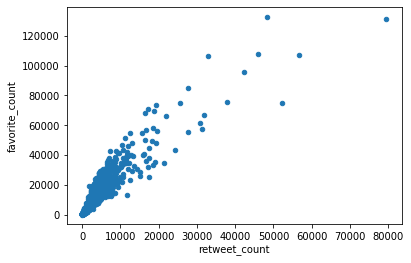

In [291]:
tweets_analysis_viual.plot(kind = 'scatter', x = 'retweet_count', y = 'favorite_count');

In [292]:
tweets_analysis_viual['retweet_count'].corr(tweets_analysis_viual['favorite_count'])

0.9135723239352272

**let's have a look at the most dog breed that was predicted by using p1 algorithm**

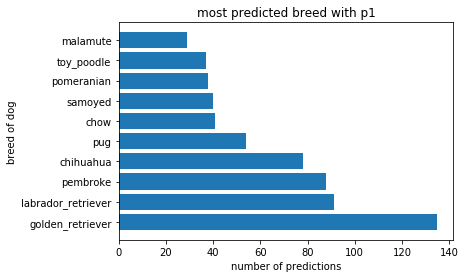

In [293]:
# since we have 214 different breeds I'll choose the most breeds that have been tweeted about

tweets_analysis_viual['p1'].value_counts().head(10)
x = tweets_analysis_viual['p1'].value_counts().head(10).index
y = tweets_analysis_viual['p1'].value_counts().head(10).values

plt.barh(x,y)
plt.title('most predicted breed with p1')
plt.xlabel('number of predictions')
plt.ylabel('breed of dog');

**let's check our model prediction percentage**

In [301]:
tweets_analysis_viual['p1_dog'].value_counts()

True     1451
False     201
Name: p1_dog, dtype: int64

In [303]:
tweets_analysis_viual['p1_dog'].value_counts().index

Index([True, False], dtype='object')

In [300]:
true_pred_percentage = tweets_analysis_viual['p1_dog'].value_counts()[1] / tweets_analysis_viual.shape[0]
false_pred_percentage = tweets_analysis_viual['p1_dog'].value_counts()[0] / tweets_analysis_viual.shape[0]

print(true_pred_percentage)
print(false_pred_percentage)

0.8783292978208233
0.12167070217917676


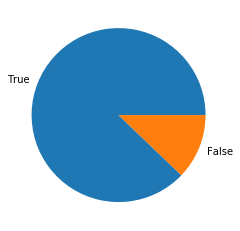

In [306]:
plt.pie(tweets_analysis_viual['p1_dog'].value_counts(), labels = tweets_analysis_viual['p1_dog'].value_counts().index);

**88% the prediction is True which means the model is not bad but at the same time it needs to be more accurate for machine learning purposes , this precntage will be lower if I didn't drop the False prediction earlier**